In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
plt.style.use('seaborn')
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


## Looking at the dataset ##

In [3]:
data.tail()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287
21596,1523300157,10/15/2014,325000.0,2,0.75,1020,1076,2.0,0.0,0.0,...,7,1020,0.0,2008,0.0,98144,47.5941,-122.299,1020,1357


In [4]:
display(data.info())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


None

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

## Dropping Values & Editing Columns##


#### Looks like the NaN values for waterfront, view, and yr_renovated can be replaced with other values. 
#### - waterfront replaced with 0
#### - view replaced with 0
#### - yr_renovated replaced with yr_built as it may not have ever been renovated

In [5]:
data['waterfront'] = data['waterfront'].fillna(0)
data['view'] = data['view'].fillna(0)
data['yr_renovated'] = data['yr_renovated'].replace(0, np.nan)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,NaN,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,NaN,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,NaN,98074,47.6168,-122.045,1800,7503


In [6]:
data['yr_renovated'] = data['yr_renovated'].fillna(data['yr_built'])
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503


In [7]:
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [8]:
for column in data:
    unique_vals = np.unique(data[column])
    num_values = len(unique_vals)
    if num_values < 30:
        print('The number of values for feature {} :{} -- {}'.format(column, num_values, unique_vals))
    else:
        print('The number of values for feature {} : {}'.format(column, num_values))

The number of values for feature id : 21420
The number of values for feature date : 372
The number of values for feature price : 3622
The number of values for feature bedrooms :12 -- [ 1  2  3  4  5  6  7  8  9 10 11 33]
The number of values for feature bathrooms :29 -- [0.5  0.75 1.   1.25 1.5  1.75 2.   2.25 2.5  2.75 3.   3.25 3.5  3.75
 4.   4.25 4.5  4.75 5.   5.25 5.5  5.75 6.   6.25 6.5  6.75 7.5  7.75
 8.  ]
The number of values for feature sqft_living : 1034
The number of values for feature sqft_lot : 9776
The number of values for feature floors :6 -- [1.  1.5 2.  2.5 3.  3.5]
The number of values for feature waterfront :2 -- [0. 1.]
The number of values for feature view :5 -- [0. 1. 2. 3. 4.]
The number of values for feature condition :5 -- [1 2 3 4 5]
The number of values for feature grade :11 -- [ 3  4  5  6  7  8  9 10 11 12 13]
The number of values for feature sqft_above : 942
The number of values for feature sqft_basement : 304
The number of values for feature yr_built :

In [9]:
data.loc[data.sqft_basement == '?', 'sqft_basement'].count()
#how many '?'s in the sqft_basement column

454

In [10]:
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan)
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0.0,0.0,...,7,1180,0.0,1955,1955.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,1933.0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,1965.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,1987.0,98074,47.6168,-122.045,1800,7503


In [11]:
data.loc[data.sqft_basement == '?', 'sqft_basement'].count()

0

In [12]:
data['sqft_basement'] = data['sqft_basement'].fillna(0)
data.loc[data.sqft_basement == '?', 'sqft_basement'].count()
data['sqft_basement'] = data['sqft_basement'].astype(float)

In [13]:
#after checking there are now no more '?' in sqft_basement and is replaced with a 0

In [14]:
data.duplicated().sum() #no duplicated values

0

In [15]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [16]:
## saving zipcode, lat, and long into a seperate dataframe for later

In [17]:
location = data[['price', 'bedrooms', 'bathrooms', 'zipcode', 'lat', 'long']]
location.head()

,price,bedrooms,bathrooms,zipcode,lat,long
0,221900.0,3,1.00,98178,47.5112,-122.257
1,538000.0,3,2.25,98125,47.7210,-122.319
2,180000.0,2,1.00,98028,47.7379,-122.233
3,604000.0,4,3.00,98136,47.5208,-122.393
4,510000.0,3,2.00,98074,47.6168,-122.045


In [18]:
location.to_csv('location.csv', index = False)

In [19]:
#removing id, date, lat, long from dataframe since i have it stored elsewhere and/or it is not necessary for modeling
data = data[['price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
              'sqft_living15', 'sqft_lot15']]

### Working with Outliers

In [20]:
def box_plot_attrs(attrs_array):
  '''
  INPUT: array of attributes
  OUTPUT: up to 2x2 box plots
  '''
  plt.figure(figsize=(16,16))
  num_attrs = len(attrs_array)
  for n in range(1, num_attrs+1):
      subplot_n = 420 + n
      plt.subplot(subplot_n)
      sns.boxplot(x=attrs_array[n-1], data=data)

def box_plot_attr(attr):
  plt.figure(figsize=(16,4))
  plt.subplot(111)
  sns.boxplot(x=attr, data=data)

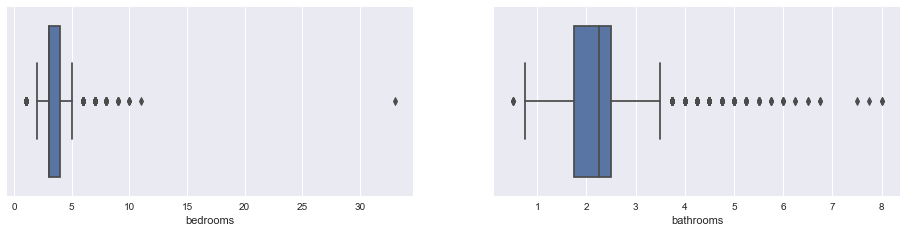

In [21]:
box_plot_attrs(['bedrooms', 'bathrooms'])
#there was already an outlier 33 for a bedroom size, 
# but both bedrooms and bathrooms are looking skewed because of outliers

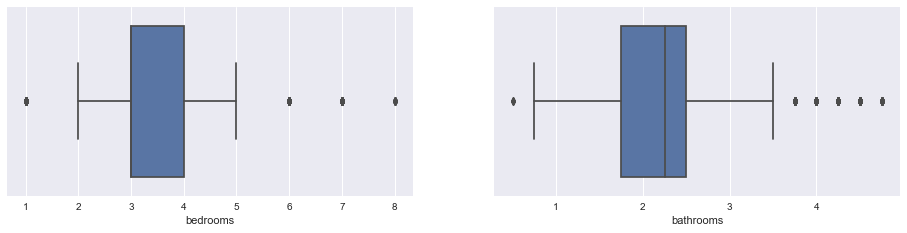

In [22]:
data = data[data.bathrooms < 5] # removing outliers
data = data[data.bedrooms < 9]
box_plot_attrs(['bedrooms', 'bathrooms'])
#now they look much better 

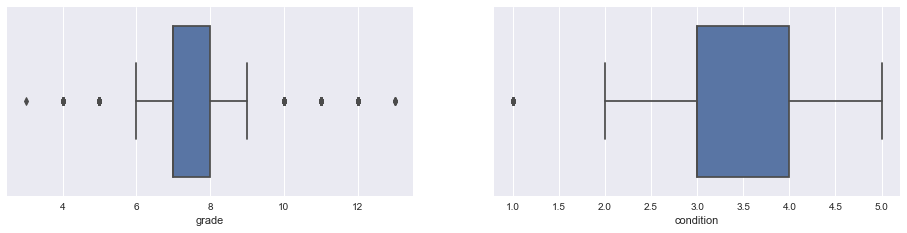

In [23]:
# looking at the rest of the features to confirm
box_plot_attrs(['grade', 'condition'])

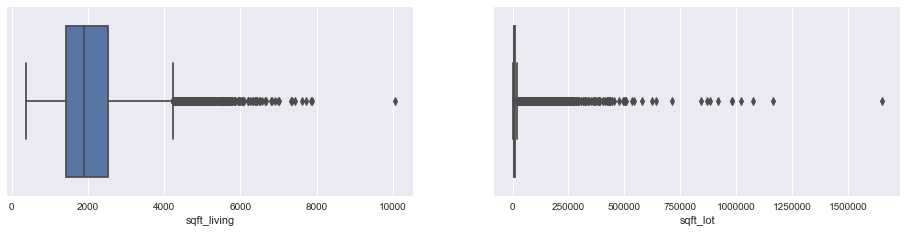

In [24]:
box_plot_attrs(['sqft_living', 'sqft_lot'])

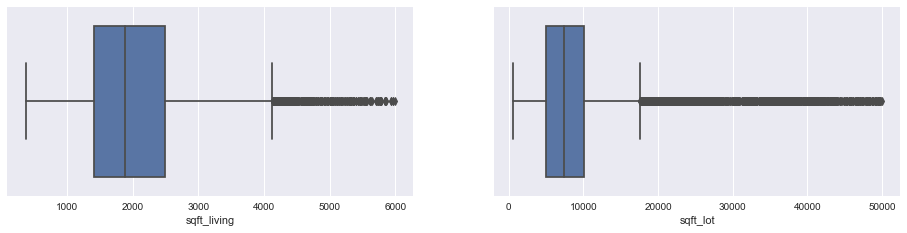

In [25]:
data = data[data.sqft_living < 6000] # removing outliers
data = data[data.sqft_lot < 50000 ]
box_plot_attrs(['sqft_living', 'sqft_lot'])
#now they look much better 

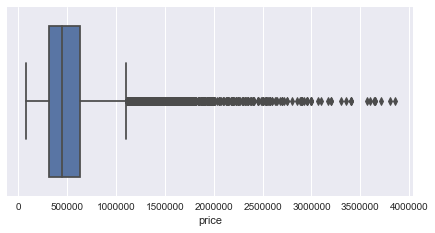

In [26]:
box_plot_attrs(['price'])

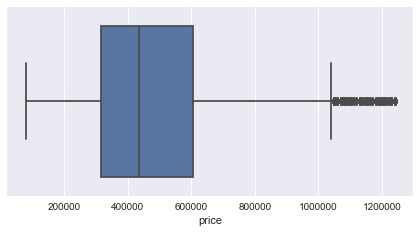

In [27]:
data = data[data.price < 1250000] # removing outliers
box_plot_attrs(['price'])
#now it looks a bit better

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19842 entries, 0 to 21596
Data columns (total 15 columns):
price            19842 non-null float64
bedrooms         19842 non-null int64
bathrooms        19842 non-null float64
sqft_living      19842 non-null int64
sqft_lot         19842 non-null int64
floors           19842 non-null float64
waterfront       19842 non-null float64
condition        19842 non-null int64
grade            19842 non-null int64
sqft_above       19842 non-null int64
sqft_basement    19842 non-null float64
yr_built         19842 non-null int64
yr_renovated     19842 non-null float64
sqft_living15    19842 non-null int64
sqft_lot15       19842 non-null int64
dtypes: float64(6), int64(9)
memory usage: 2.4 MB


## Feature Selection

In [29]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,1955.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,1933.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,1965.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,1987.0,1800,7503


In [30]:
data.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [31]:
data.to_csv('cleaned_data.csv', index = False) 

## Exploring Cleaned Data

In [32]:
df = pd.read_csv('cleaned_data.csv')
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,1955.0,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,1933.0,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,1965.0,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,1987.0,1800,7503


In [33]:
df.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
count,1.984200e+04,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000
mean,4.808393e+05,3.331821,2.048798,1965.260810,8971.460236,1.478203,0.002671,3.409334,7.533263,1695.494809,264.179165,1970.507308,1972.278551,1915.197158,8864.170648
std,2.195000e+05,0.876626,0.705812,767.878843,7474.282173,0.539168,0.051615,0.647770,1.039382,718.108453,405.398975,29.410492,29.041721,619.528511,9533.727042
min,7.800000e+04,1.000000,0.500000,370.000000,520.000000,1.000000,0.000000,1.000000,3.000000,370.000000,0.000000,1900.000000,1900.000000,399.000000,651.000000
25%,3.149125e+05,3.000000,1.500000,1390.000000,5000.000000,1.000000,0.000000,3.000000,7.000000,1170.000000,0.000000,1951.000000,1953.000000,1460.000000,5000.000000
50%,4.350000e+05,3.000000,2.000000,1846.000000,7350.500000,1.000000,0.000000,3.000000,7.000000,1510.000000,0.000000,1973.000000,1976.000000,1790.000000,7447.000000
75%,6.050000e+05,4.000000,2.500000,2420.000000,9900.000000,2.000000,0.000000,4.000000,8.000000,2080.000000,500.000000,1996.000000,1998.000000,2260.000000,9601.000000
max,1.240000e+06,8.000000,4.750000,5960.000000,49936.000000,3.500000,1.000000,5.000000,12.000000,5710.000000,2570.000000,2015.000000,2015.000000,5790.000000,335289.000000


In [34]:
df.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
price,1.000000,0.308668,0.456755,0.628361,0.105748,0.272620,0.068219,0.040376,0.638375,0.528811,0.249044,0.046005,0.081773,0.570767,0.061434
bedrooms,0.308668,1.000000,0.505708,0.612919,0.142617,0.159953,-0.029615,0.019611,0.342071,0.488206,0.286786,0.173030,0.176035,0.399660,0.080578
bathrooms,0.456755,0.505708,1.000000,0.716648,0.067061,0.508042,-0.004616,-0.141361,0.618677,0.637960,0.221115,0.546032,0.563838,0.538676,0.040486
sqft_living,0.628361,0.612919,0.716648,1.000000,0.272849,0.341258,-0.000404,-0.072978,0.711477,0.851271,0.377487,0.348365,0.359625,0.749364,0.179102
sqft_lot,0.105748,0.142617,0.067061,0.272849,1.000000,-0.142424,0.064012,0.058278,0.173355,0.252831,0.067777,0.024464,0.017151,0.310978,0.728602
floors,0.272620,0.159953,0.508042,0.341258,-0.142424,1.000000,-0.003341,-0.280242,0.459004,0.532258,-0.290667,0.512156,0.520938,0.271630,-0.104160
waterfront,0.068219,-0.029615,-0.004616,-0.000404,0.064012,-0.003341,1.000000,0.012520,-0.005884,-0.011919,0.021060,-0.036352,-0.020166,0.007986,0.084549
condition,0.040376,0.019611,-0.141361,-0.072978,0.058278,-0.280242,0.012520,1.000000,-0.171213,-0.180223,0.174371,-0.357995,-0.384745,-0.116856,0.052767
grade,0.638375,0.342071,0.618677,0.711477,0.173355,0.459004,-0.005884,-0.171213,1.000000,0.712025,0.083963,0.484262,0.488233,0.684554,0.122220
sqft_above,0.528811,0.488206,0.637960,0.851271,0.252831,0.532258,-0.011919,-0.180223,0.712025,1.000000,-0.155817,0.459829,0.461501,0.727240,0.174552


In [35]:
feats = ['price', 'sqft_living', 'grade','sqft_above', 'sqft_living15', 'bathrooms', 'waterfront', 'floors']
corr = df[feats].corr()
corr

,price,sqft_living,grade,sqft_above,sqft_living15,bathrooms,waterfront,floors
price,1.000000,0.628361,0.638375,0.528811,0.570767,0.456755,0.068219,0.272620
sqft_living,0.628361,1.000000,0.711477,0.851271,0.749364,0.716648,-0.000404,0.341258
grade,0.638375,0.711477,1.000000,0.712025,0.684554,0.618677,-0.005884,0.459004
sqft_above,0.528811,0.851271,0.712025,1.000000,0.727240,0.637960,-0.011919,0.532258
sqft_living15,0.570767,0.749364,0.684554,0.727240,1.000000,0.538676,0.007986,0.271630
bathrooms,0.456755,0.716648,0.618677,0.637960,0.538676,1.000000,-0.004616,0.508042
waterfront,0.068219,-0.000404,-0.005884,-0.011919,0.007986,-0.004616,1.000000,-0.003341
floors,0.272620,0.341258,0.459004,0.532258,0.271630,0.508042,-0.003341,1.000000


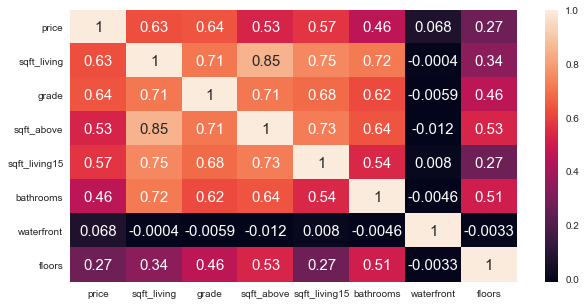

In [36]:
plt.figure(figsize=(10, 5))
sns.heatmap(corr, annot=True, annot_kws={'size':15});
#top and bottom of heatmap was getting cut off so found a solution below to adjust 
# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values
plt.show()

### Feature Scaling and Normalizing

### Normalizing Continuous Variables

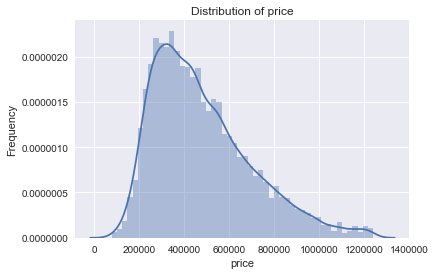

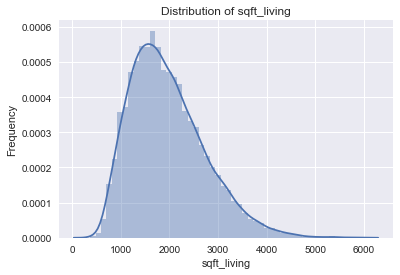

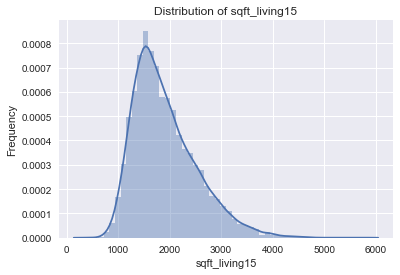

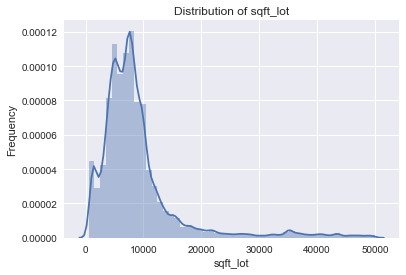

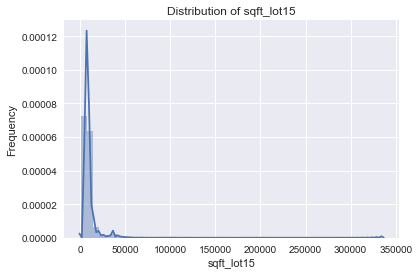

In [37]:
columns = ['price', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(df[col], hist=True, kde=True)
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

In [38]:
def log_transform(cat):
    log_cat = (cat - np.mean(cat)) / np.sqrt(np.var(cat))
    return log_cat

In [39]:
# normalizing variables by taking log
log_sq_living = np.log(df['sqft_living'])
log_sq_living15 = np.log(df['sqft_living15'])
log_sq_lot = np.log(df['sqft_lot'])
log_sq_lot15 = np.log(df['sqft_lot15'])

# transforming variables so that they are on the same scale
df['sqft_living'] = log_transform(log_sq_living)
df['sqft_living15'] = log_transform(log_sq_living15)
df['sqft_lot'] = log_transform(log_sq_lot)
df['sqft_lot15'] = log_transform(log_sq_lot15)

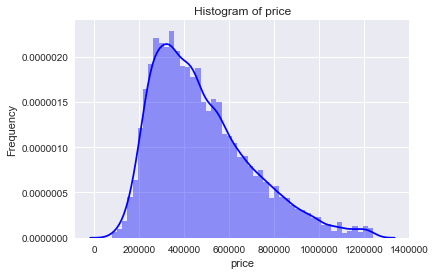

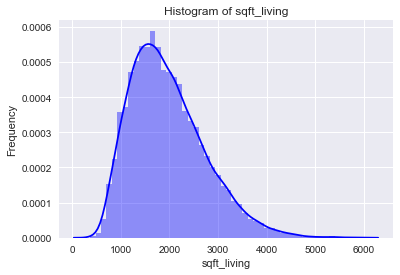

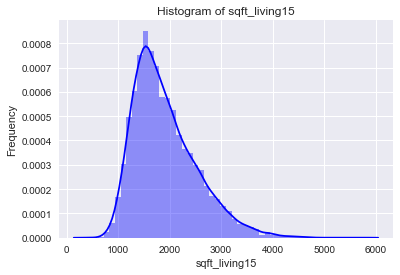

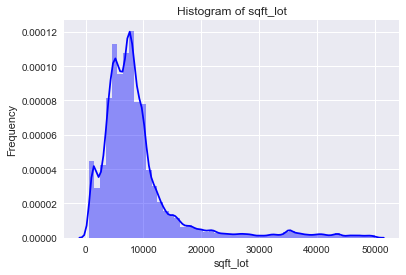

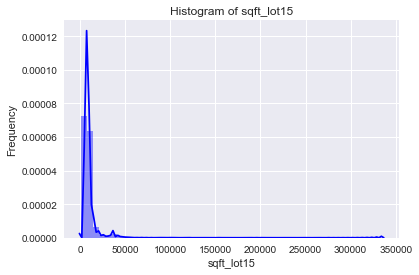

In [40]:
#seeing how it turns out after logging
columns = ['price', 'sqft_living', 'sqft_living15', 'sqft_lot', 'sqft_lot15']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(data[col], hist=True, kde=True, color='blue')
    plt.title('Histogram of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

### Changing certain features to category types

In [41]:
# changing data type to category, then converting

df['bedrooms'] = df['bedrooms'].astype('category')
bedrooms = pd.get_dummies(df['bedrooms'], prefix='br', drop_first=True)

df['bathrooms'] = df['bathrooms'].astype('category')
bathrooms = pd.get_dummies(df['bathrooms'], prefix='bath', drop_first=True)

df['floors'] = df['floors'].astype('category')
floors = pd.get_dummies(df['floors'], prefix='flr', drop_first=True)

df['condition'] = df['condition'].astype('category')
condition = pd.get_dummies(df['condition'], prefix='con', drop_first=True)

df['grade'] = df['grade'].astype('category')
grade = pd.get_dummies(df['grade'], prefix='gd', drop_first=True)

df['waterfront'] = df['waterfront'].astype('category')
waterfront = pd.get_dummies(df['waterfront'], prefix='wf', drop_first=True)

In [42]:
# adding these new categories to our dataframe
df = pd.concat([df,bedrooms, bathrooms, floors, condition, grade, waterfront], axis=1)

In [43]:
# dropping the old columns that contained this information.
df.drop(['bedrooms', 'bathrooms', 'floors', 'condition', 'grade', 'waterfront'], axis=1, inplace=True)

In [44]:
df.describe()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,br_2,...,gd_4,gd_5,gd_6,gd_7,gd_8,gd_9,gd_10,gd_11,gd_12,wf_1.0
count,1.984200e+04,1.984200e+04,1.984200e+04,19842.000000,19842.000000,19842.000000,19842.000000,1.984200e+04,1.984200e+04,19842.000000,...,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000,19842.000000
mean,4.808393e+05,-3.351819e-15,-5.729606e-16,1695.494809,264.179165,1970.507308,1972.278551,6.589047e-16,-1.111544e-15,0.133857,...,0.001260,0.011289,0.099738,0.439573,0.290445,0.112237,0.037295,0.007812,0.000302,0.002671
std,2.195000e+05,1.000025e+00,1.000025e+00,718.108453,405.398975,29.410492,29.041721,1.000025e+00,1.000025e+00,0.340508,...,0.035474,0.105652,0.299658,0.496348,0.453979,0.315665,0.189488,0.088040,0.017387,0.051615
min,7.800000e+04,-4.027120e+00,-3.675923e+00,370.000000,0.000000,1900.000000,1900.000000,-4.891234e+00,-3.588041e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.149125e+05,-6.827743e-01,-4.772613e-01,1170.000000,0.000000,1951.000000,1953.000000,-7.159587e-01,-5.040897e-01,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.350000e+05,3.411912e-02,6.730047e-02,1510.000000,0.000000,1973.000000,1976.000000,-6.007351e-02,9.853648e-02,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.050000e+05,7.182384e-01,4.881139e-01,2080.000000,500.000000,1996.000000,1998.000000,6.903422e-01,4.828514e-01,0.000000,...,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.240000e+06,2.995640e+00,2.775019e+00,5710.000000,2570.000000,2015.000000,2015.000000,3.718303e+00,5.857725e+00,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19842 entries, 0 to 19841
Data columns (total 52 columns):
price            19842 non-null float64
sqft_living      19842 non-null float64
sqft_lot         19842 non-null float64
sqft_above       19842 non-null int64
sqft_basement    19842 non-null float64
yr_built         19842 non-null int64
yr_renovated     19842 non-null float64
sqft_living15    19842 non-null float64
sqft_lot15       19842 non-null float64
br_2             19842 non-null uint8
br_3             19842 non-null uint8
br_4             19842 non-null uint8
br_5             19842 non-null uint8
br_6             19842 non-null uint8
br_7             19842 non-null uint8
br_8             19842 non-null uint8
bath_0.75        19842 non-null uint8
bath_1.0         19842 non-null uint8
bath_1.25        19842 non-null uint8
bath_1.5         19842 non-null uint8
bath_1.75        19842 non-null uint8
bath_2.0         19842 non-null uint8
bath_2.25        19842 non-null uint8
bat

In [46]:
df.head()

,price,sqft_living,sqft_lot,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15,br_2,...,gd_4,gd_5,gd_6,gd_7,gd_8,gd_9,gd_10,gd_11,gd_12,wf_1.0
0,221900.0,-1.096635,-0.304539,1180,0.0,1955,1955.0,-0.992008,-0.319209,0,...,0,0,0,1,0,0,0,0,0,0
1,538000.0,0.870195,0.046284,2170,400.0,1951,1991.0,-0.245102,0.137043,0,...,0,0,0,1,0,0,0,0,0,0
2,180000.0,-2.175269,0.502317,770,0.0,1933,1933.0,1.286644,0.218571,1,...,0,0,1,0,0,0,0,0,0,0
3,604000.0,0.185533,-0.477261,1050,910.0,1965,1965.0,-0.944324,-0.504090,0,...,0,0,0,1,0,0,0,0,0,0
4,510000.0,-0.203973,0.201026,1680,0.0,1987,1987.0,-0.042143,0.109869,0,...,0,0,0,0,1,0,0,0,0,0


In [47]:
df.to_csv('model_data.csv', index = False) 